# SI 618 - Homework #7: Classifiers
or: How I Learned to Stop Worrying and Love Machine Learning

Version 2023.11.08.1.CT

This is, perhaps, one of the most exciting homework assignments that you have encountered in this course!

You are going to try your hand at a Kaggle competition to predict which passengers on board the Spaceship Titanic are transported to an alternate dimension.

You can access the competition here: **https://www.kaggle.com/c/spaceship-titanic**

This assignment is similar to the Kaggle competition that we did in class, but it uses a different and larger dataset.

The basic steps for this assignment are the same as what we did in class:

1. Accept the rules and join the competition
2. Download the data (from the data tab of the competition page)
3. Understand the problem
4. EDA (Exploratory Data Analysis)
5. Train, tune, and ensemble (!) your machine learning models
6. Upload your prediction as a submission on Kaggle and receive an accuracy score

additionally, you will

7. Upload your final notebook to Canvas and report your best accuracy score.  

Note that class grades are not entirely dependent on your accuracy score.  
All models that achieve 80% accuracy will receive full points for
the accuracy component of this assignment.

Rubric:

1. (20 points) Conduct an EDA. You must demonstrate that you understand the data and the problem.
2. (60 points) Train, tune, and ensemble machine learning models.  You must use at least 3 different models, and you must ensemble them in some way.  You must also tune your models to improve accuracy.
4. (10 points) Accuracy score based on Kaggle submission report (or alternative, see NOTE above).
5. (10 points) PEP-8, grammar, spelling, style, etc.

Some additional notes:

1. If you use another notebook, code, or approaches be sure to reference the original work. (Note that we recommend you study existing Kaggle notebooks before starting your own work.)
2. You can help each other but in the end you must submit your own work, both to Kaggle and to Canvas.

Some additional resources:

* "ensemble" your models with a [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)
* a good primer on [feature engineering](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/)
* There are a lot of good [notebooks to study](https://www.kaggle.com/competitions/spaceship-titanic/code) (check the number of upvotes to help guide your exploration), but be careful to cite any code that you use, and be careful to not accidentally (or intentionally) cheat.

## GOOD LUCK!
(and don't cheat)

One final note:  Your submission should be a self-contained notebook that is NOT based
on this one.  Studying the existing Kaggle competition notebooks should
give you a sense of what makes a "good" notebook.

In [37]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.cm as cm # colormaps
import matplotlib.pyplot as plt
# plt.style.use("dark_background")
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
import xgboost as xgb

import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

<style>
    .my-background {
        background-color: #36c0e3; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h1>EDA</h1>
    <!-- Add your content here -->
</div>

In [38]:
train = pd.read_csv('ST_train.csv')
test = pd.read_csv('ST_test.csv')
sample_submission = pd.read_csv('ST_sample_submission.csv')

In [39]:
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [40]:
test.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

<style>
    .my-background {
        background-color: #36c0e3; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>🔵 Column Transforms</h3>
    <!-- Add your content here -->
</div>

First I am splitting the `Cabin` feature to give corresponding `Deck`, `Num` and `Side` value.

In [41]:
train['Cabin'].fillna('Unknown/-1/Unknown', inplace=True)
test['Cabin'].fillna('Unknown/-1/Unknown', inplace=True)
train['Name'].fillna('Unknown', inplace=True)
test['Name'].fillna('Unknown', inplace=True)

In [42]:
# split Cabin at '/' and make Deck, Num, Side columns
train['Deck'] = train['Cabin'].str.split('/').str[0]
train['Num'] = train['Cabin'].str.split('/').str[1].astype(int)
train['Side'] = train['Cabin'].str.split('/').str[2]

test['Deck'] = test['Cabin'].str.split('/').str[0]
test['Num'] = test['Cabin'].str.split('/').str[1].astype(int)
test['Side'] = test['Cabin'].str.split('/').str[2]

In [43]:
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported Deck  Num Side  
0        False    B    0    P  
1         True    F    0    S  
2        False    A    0    S  
3        False    A    0    S  
4         True    F    1    S

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Deck          8693 non-null   object 
 15  Num           8693 non-null   int32  
 16  Side          8693 non-null   object 
dtypes: bool(1), float64(6), int32(1), object(9)
memory usage: 1.0+ MB


<style>
    .my-background {
        background-color: #36c0e3; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>🟡 Graphical Analysis</h3>
    <!-- Add your content here -->
</div>

In [45]:
services = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
            'Num', 'Deck', 'Side', 'Transported',]
to_from = ['HomePlanet', 'Destination']
passenger = ['Age' 'CryoSleep', 'VIP']

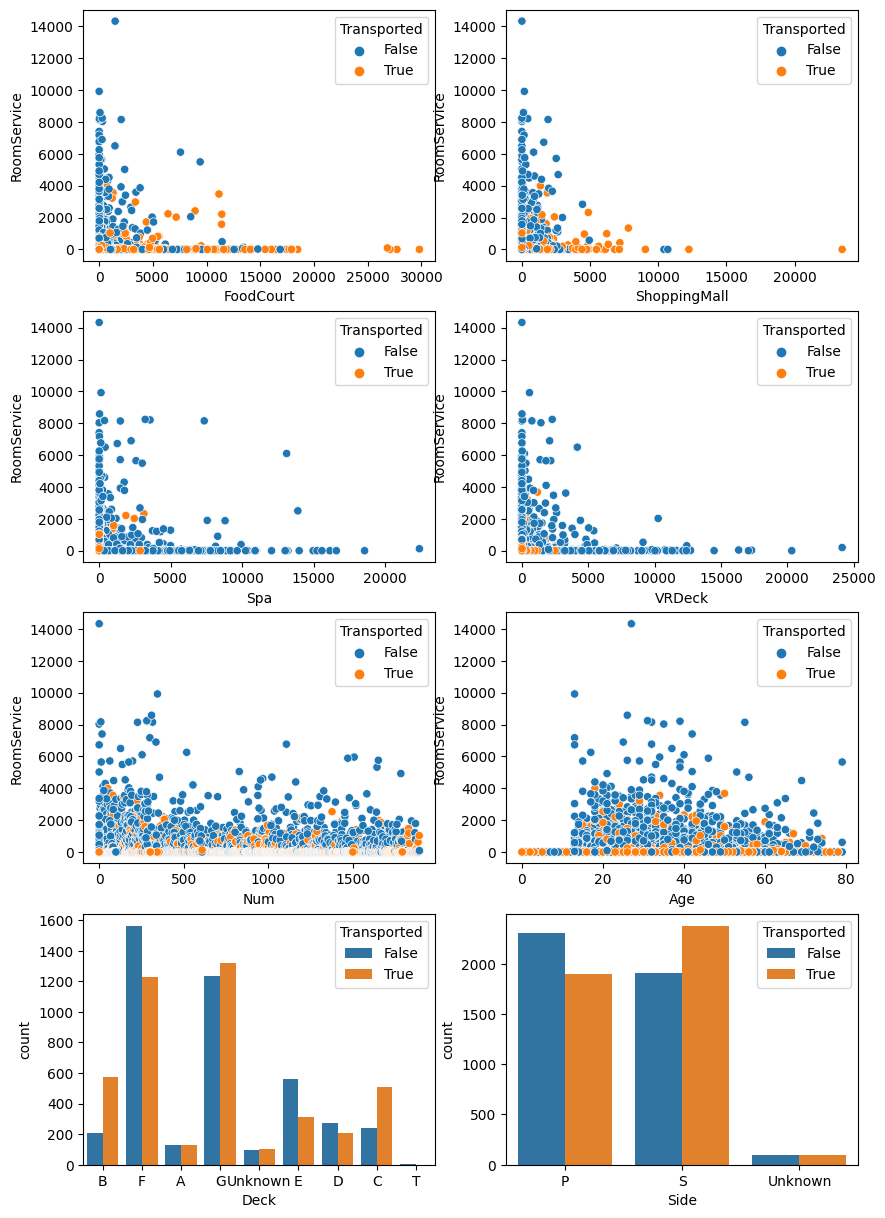

In [46]:
fig, axes = plt.subplots(4, 2, figsize=(10, 15))
sns.scatterplot(data=train, x='FoodCourt', y='RoomService', hue='Transported', ax=axes[0, 0])
sns.scatterplot(data=train, x='ShoppingMall', y='RoomService', hue='Transported', ax=axes[0, 1])
sns.scatterplot(data=train, x='Spa', y='RoomService', hue='Transported', ax=axes[1, 0])
sns.scatterplot(data=train, x='VRDeck', y='RoomService', hue='Transported', ax=axes[1, 1])
sns.scatterplot(data=train, x='Num', y='RoomService', hue='Transported', ax=axes[2, 0])
sns.scatterplot(data=train, x='Age', y='RoomService', hue='Transported', ax=axes[2, 1])
for i, ax in enumerate(axes.flatten()):
    if i > 5:
        sns.countplot(data=train, x=services[i], ax=ax, hue = 'Transported')
plt.show()

I have considered scatter plots of some variables agains one another with 'hue' being `Transported` so as to observe if the variables have any direct effect on it.

In [47]:
# % of 0 in service columns
for i in range(5):
    print('Fraction of 0s in', services[i], ' : ', 
          train[train[services[i]] == 0].shape[0] / train.shape[0])

Fraction of 0s in RoomService  :  0.6415506729552514
Fraction of 0s in FoodCourt  :  0.6276314275854136
Fraction of 0s in ShoppingMall  :  0.6427010238122628
Fraction of 0s in Spa  :  0.6124467962728632
Fraction of 0s in VRDeck  :  0.632117795927758


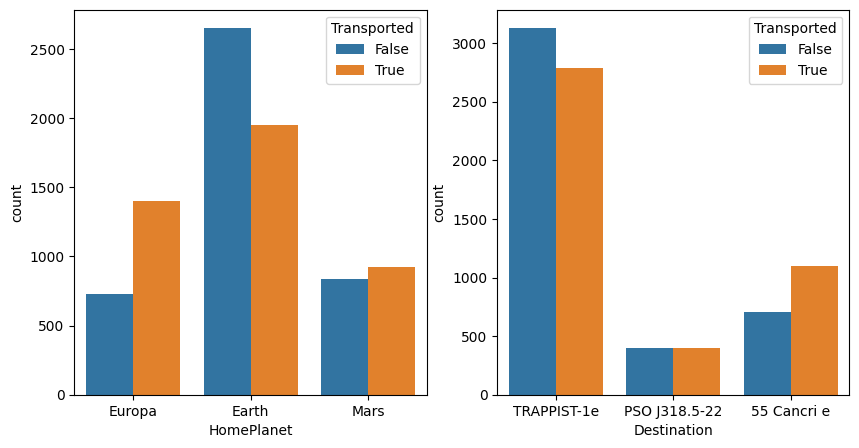

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data=train, x='HomePlanet', hue='Transported', ax=axes[0])
sns.countplot(data=train, x='Destination', hue='Transported', ax=axes[1])
plt.show()

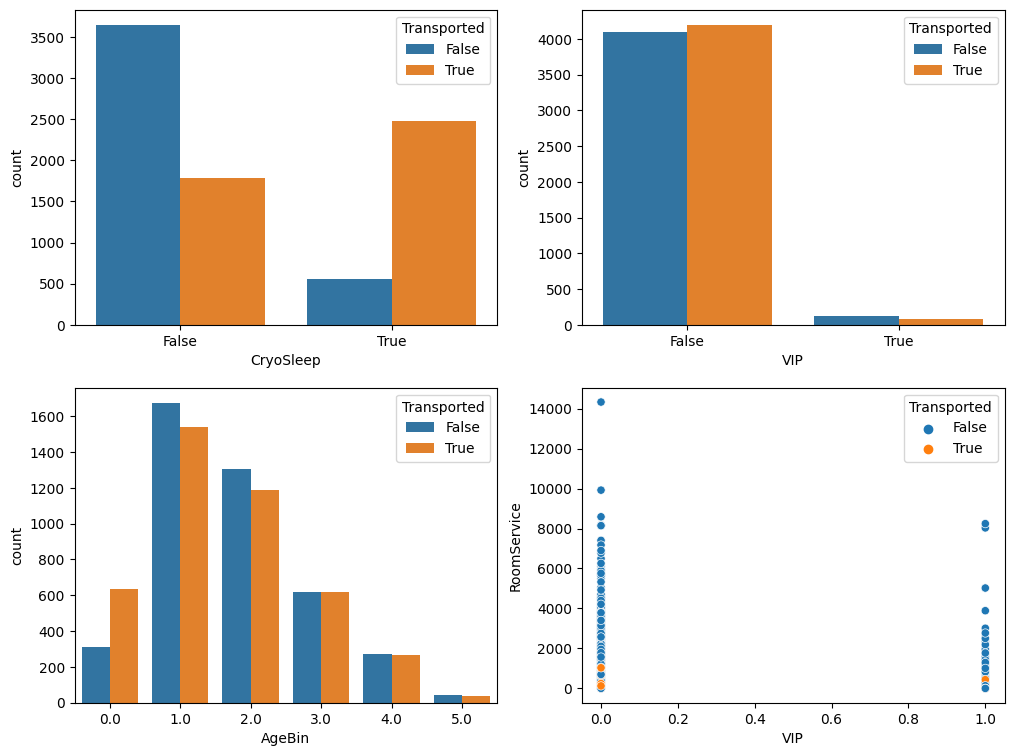

In [49]:
# create Age bins
train['AgeBin'] = pd.cut(np.array(train['Age']), bins=6, labels=False)
test['AgeBin'] = pd.cut(np.array(test['Age']), bins=6, labels=False)

fig, axes = plt.subplots(2, 2, figsize=(12, 9))
sns.countplot(data=train, x='CryoSleep', hue='Transported', ax=axes[0, 0])
sns.countplot(data=train, x='VIP', hue='Transported', ax=axes[0, 1])
sns.countplot(data=train, x='AgeBin', hue='Transported', ax=axes[1, 0])
sns.scatterplot(data=train, x='VIP', y='RoomService', hue='Transported', ax=axes[1, 1])
plt.show()

I have created `AgeBin` feature to understand the effect of `Transported` category.

<style>
    .my-background {
        background-color: #36c0e3; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>🟠 Bivariate Analysis</h3>
    <!-- Add your content here -->
</div>

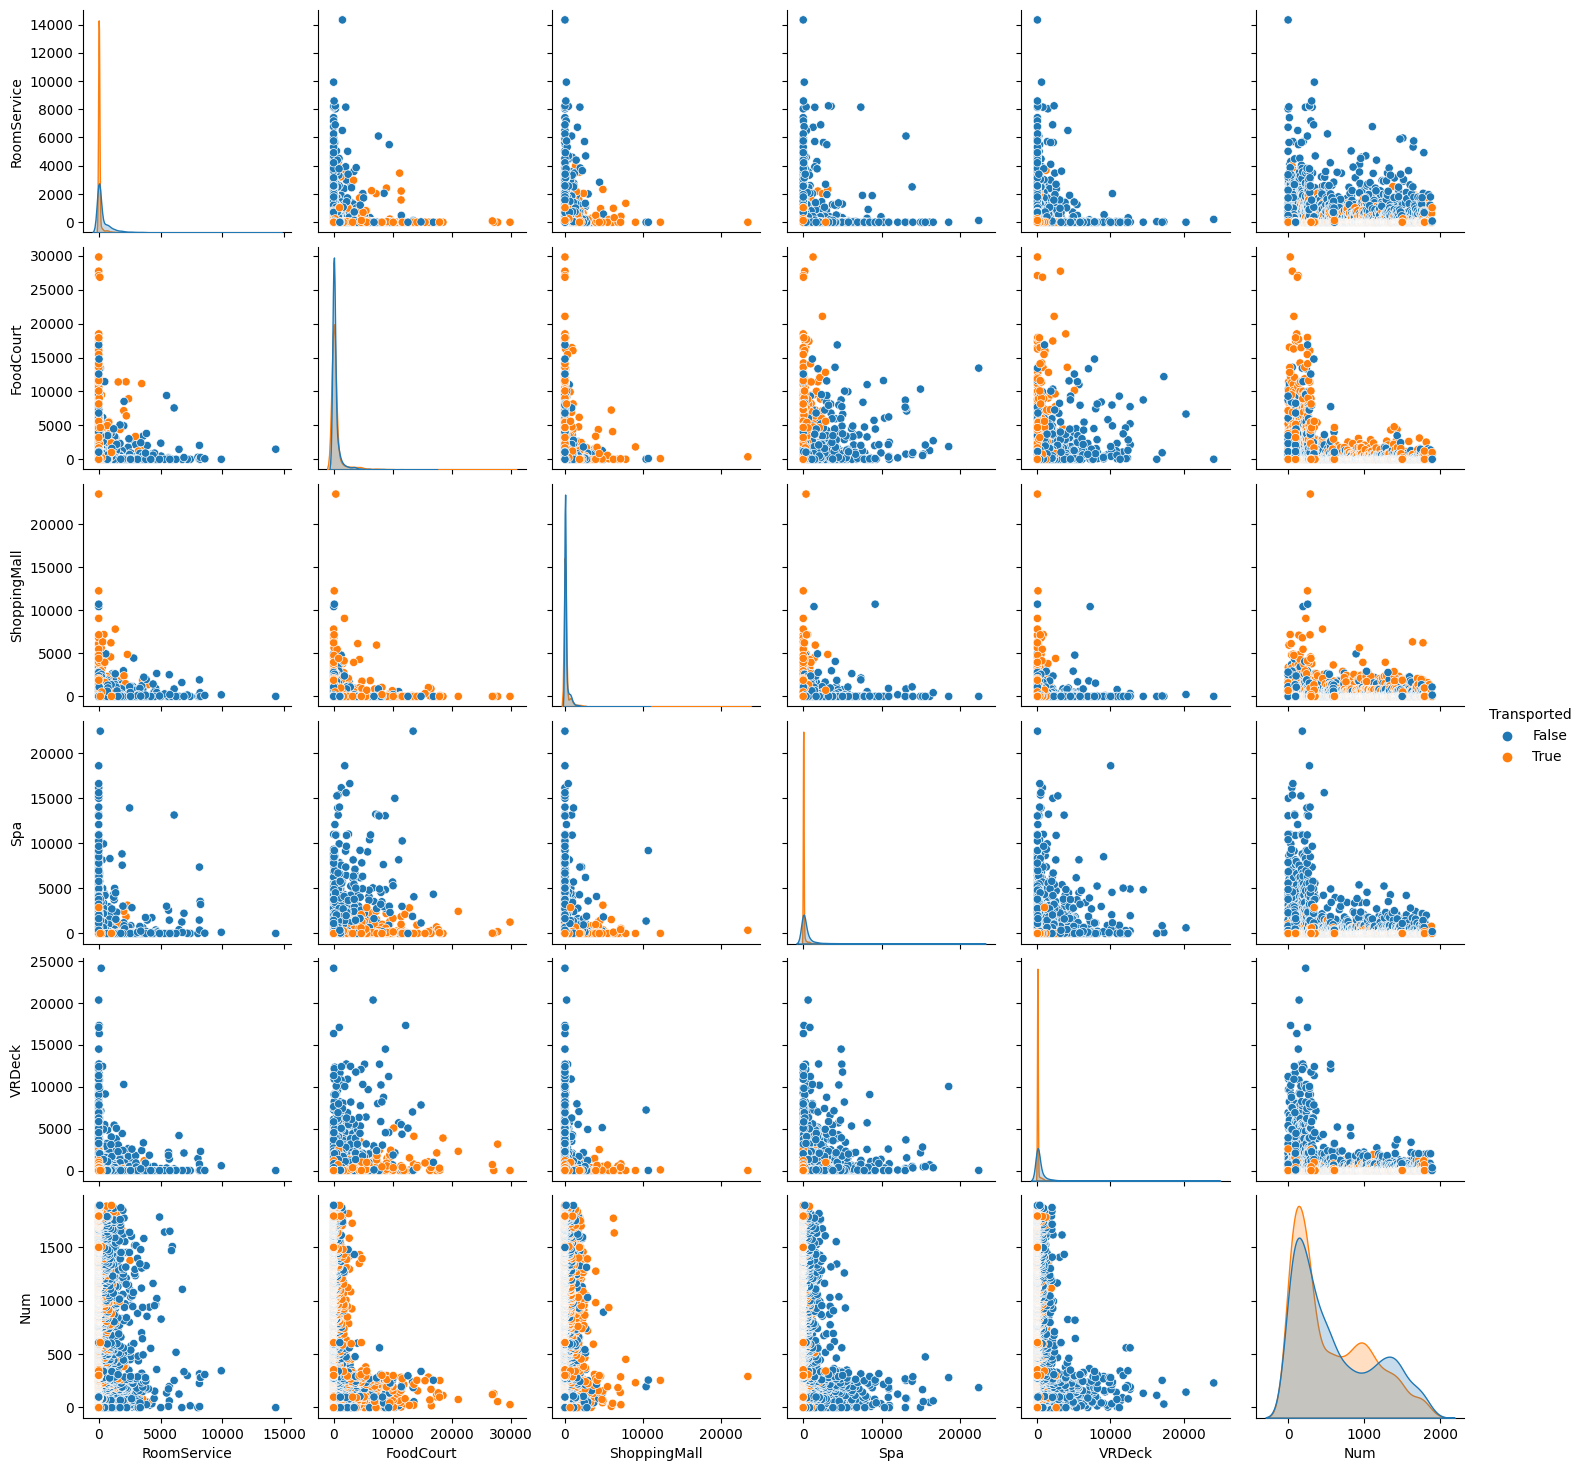

In [50]:
sns.pairplot(train[services], hue='Transported')

The relationship between various variables as shown above is seen to be quiet complicated. I will try to analyse it further.

<style>
    .my-background {
        background-color: #36c0e3; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>🔴 Null Values treatment</h3>
    <!-- Add your content here -->
</div>

In [51]:
cat_cols_1 = ['HomePlanet', 'CryoSleep', 'Destination',
              'VIP', 'Deck', 'Side', 'AgeBin']
num_cols_1 = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
            'VRDeck', 'Num']

In [52]:
from sklearn.impute import SimpleImputer

col_transformer = SimpleImputer(strategy='most_frequent')
train[cat_cols_1] = col_transformer.fit_transform(train[cat_cols_1])
test[cat_cols_1] = col_transformer.transform(test[cat_cols_1])

train[num_cols_1] = train[num_cols_1].fillna(train[num_cols_1].mean())
test[num_cols_1] = test[num_cols_1].fillna(test[num_cols_1].mean())

In [53]:
train.isna().sum().to_frame().T

PassengerId  HomePlanet  CryoSleep  Cabin  Destination  Age  VIP  \
0            0           0          0      0            0    0    0   

   RoomService  FoodCourt  ShoppingMall  Spa  VRDeck  Name  Transported  Deck  \
0            0          0             0    0       0     0            0     0   

   Num  Side  AgeBin  
0    0     0       0

In [54]:
test.isna().sum().to_frame().T

PassengerId  HomePlanet  CryoSleep  Cabin  Destination  Age  VIP  \
0            0           0          0      0            0    0    0   

   RoomService  FoodCourt  ShoppingMall  Spa  VRDeck  Name  Deck  Num  Side  \
0            0          0             0    0       0     0     0    0     0   

   AgeBin  
0       0

<style>
    .my-background {
        background-color: #89b505; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h1>Data Preprocessing</h1>
    <!-- Add your content here -->
</div>

<style>
    .my-background {
        background-color: #89b505; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>🔵 Feature Transformations</h3>
    <!-- Add your content here -->
</div>

Converting Features into usable datatypes

In [55]:
# convert to int
train['CryoSleep'] = train['CryoSleep'].astype(int)
test['CryoSleep'] = test['CryoSleep'].astype(int)

train['VIP'] = train['VIP'].astype(int)
test['VIP'] = test['VIP'].astype(int)

In [56]:
train['AgeBin'] = train['AgeBin'].astype(int)
test['AgeBin'] = test['AgeBin'].astype(int)

cat_cols_2 = ['HomePlanet',  'Destination', 'Deck', 'Side']
num_cols_2 = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
            'VRDeck', 'Num', 'CryoSleep', 'VIP']

<style>
    .my-background {
        background-color: #89b505; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>🟡  Correlation plot</h3>
    <!-- Add your content here -->
</div>

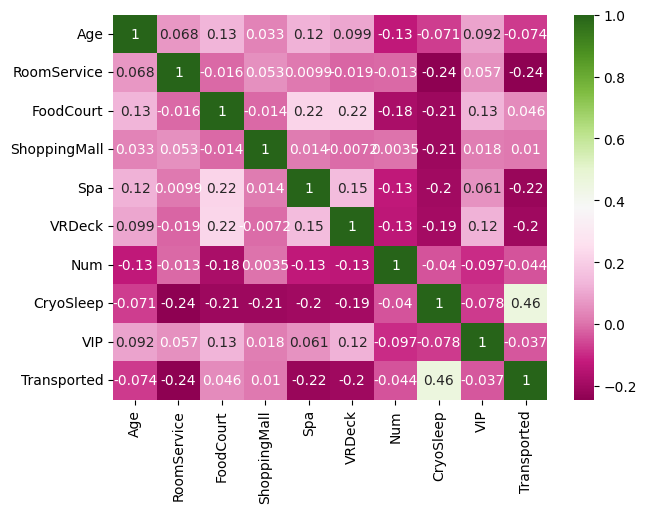

In [57]:
# correlation matrix
corr_cols = num_cols_2 + ['Transported']
corr = train[corr_cols].corr()

# correlation heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr, cmap='PiYG', annot=True)
plt.show()

The Correlation plot of numerical columns is as shown above. However, no correlation is observed between different features.

<style>
    .my-background {
        background-color: #89b505; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>🟠 One Hot Encoding</h3>
    <!-- Add your content here -->
</div>

I am encoding the categorical variables with One Hot encoding and dropping the first instance to avoid collinearity.

In [58]:
# get dummies for categorical variables
train = pd.get_dummies(train, columns=cat_cols_2, drop_first=True)
test = pd.get_dummies(test, columns=cat_cols_2, drop_first=True)

train.head()

PassengerId  CryoSleep  Cabin   Age  VIP  RoomService  FoodCourt  \
0     0001_01          0  B/0/P  39.0    0          0.0        0.0   
1     0002_01          0  F/0/S  24.0    0        109.0        9.0   
2     0003_01          0  A/0/S  58.0    1         43.0     3576.0   
3     0003_02          0  A/0/S  33.0    0          0.0     1283.0   
4     0004_01          0  F/1/S  16.0    0        303.0       70.0   

   ShoppingMall     Spa  VRDeck               Name  Transported  Num  AgeBin  \
0           0.0     0.0     0.0    Maham Ofracculy        False    0       2   
1          25.0   549.0    44.0       Juanna Vines         True    0       1   
2           0.0  6715.0    49.0      Altark Susent        False    0       4   
3         371.0  3329.0   193.0       Solam Susent        False    0       2   
4         151.0   565.0     2.0  Willy Santantines         True    1       1   

   HomePlanet_Europa  HomePlanet_Mars  Destination_PSO J318.5-22  \
0               True            False                      False   
1              False            False                      False   
2               True            False                      False   
3               True            False                      False   
4              False            False                      False   

   Destination_TRAPPIST-1e  Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  \
0                     True    True   False   False   False   False   False   
1                     True   False   False   False   False    True   False   
2                     True   False   False   False   False   False   False   
3                     True   False   False   False   False   False   False   
4                     True   False   False   False   False    True   False   

   Deck_T  Deck_Unknown  Side_S  Side_Unknown  
0   False         False   False         False  
1   False         False    True         False  
2   False         False    True         False  
3   False         False    True         False  
4   False         False    True         False

<style>
    .my-background {
        background-color: #870381; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h1>Model Training</h1>
    <!-- Add your content here -->
</div>

Created `X` and `y` as input and output variables

In [59]:
features_to_drop = ['PassengerId', 'Name', 'Cabin', 'Transported']

outcome = 'Transported'

X = train.drop(features_to_drop, axis=1)
y = train[outcome]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=618)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6954, 24), (1739, 24), (6954,), (1739,))

In [60]:
X_train.head()

CryoSleep       Age  VIP  RoomService   FoodCourt  ShoppingMall    Spa  \
6589          1  28.82793    0          0.0    0.000000           0.0    0.0   
7348          0  17.00000    0         99.0  516.000000        1967.0    0.0   
6676          0  36.00000    0         56.0  458.077203          81.0    0.0   
7618          0  18.00000    0          0.0  297.000000           0.0  588.0   
3388          1  28.82793    0          0.0    0.000000           0.0    0.0   

      VRDeck   Num  AgeBin  HomePlanet_Europa  HomePlanet_Mars  \
6589     0.0   219       1               True            False   
7348     6.0  1505       1              False            False   
6676   468.0  1461       2              False            False   
7618    23.0  1314       1              False            False   
3388     0.0   124       1              False             True   

      Destination_PSO J318.5-22  Destination_TRAPPIST-1e  Deck_B  Deck_C  \
6589                      False                     True   False   False   
7348                      False                     True   False   False   
6676                       True                    False   False   False   
7618                      False                     True   False   False   
3388                      False                     True   False   False   

      Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Deck_Unknown  Side_S  \
6589    True   False   False   False   False         False   False   
7348   False   False    True   False   False         False    True   
6676   False   False    True   False   False         False   False   
7618   False   False   False    True   False         False   False   
3388    True   False   False   False   False         False   False   

      Side_Unknown  
6589         False  
7348         False  
6676         False  
7618         False  
3388         False

In [61]:
from sklearn.metrics import accuracy_score

def model_training(model):
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test).astype(bool)
    # print(y_pred)
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

    return model

In [26]:
from sklearn.ensemble import RandomForestClassifier
model_training(RandomForestClassifier())

Accuracy: 0.7878


RandomForestClassifier()

In [27]:
from sklearn.svm import SVC as SVMClassifier
model_training(SVMClassifier(kernel='rbf'))

Accuracy: 0.7723


SVC()

In [29]:
# %pip install lightgbm

In [63]:
from lightgbm import LGBMClassifier as LightGBMClassifier
model_training(LightGBMClassifier(verbose=0))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Accuracy: 0.8010


LGBMClassifier(verbose=0)

In [93]:
model_training(xgb.XGBClassifier(random_state=42))

Accuracy: 0.7930


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

I have fitted 4 classifier models to find the accuracy score by each model.

<style>
    .my-background {
        background-color: #870381; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>🟡 Model Tuning</h3>
    <!-- Add your content here -->
</div>

In the tuning part, I have considered `GridSearchCV` for expreimenting accuracy at various models.

In [88]:
params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=5)
grid.fit(X, y)

print('Best parameters:', grid.best_params_)

model_training(RandomForestClassifier(random_state=42, **grid.best_params_))

Best parameters: {'max_depth': 6, 'n_estimators': 200}
Accuracy: 0.7614


RandomForestClassifier(max_depth=6, n_estimators=200, random_state=42)

In [127]:
from sklearn.ensemble import GradientBoostingClassifier

params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

grid = GridSearchCV(GradientBoostingClassifier(random_state=42), params, cv=5)
grid.fit(X_train, y_train)

print('Best parameters:', grid.best_params_)

model_training(GradientBoostingClassifier(random_state=42, **grid.best_params_))

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Accuracy: 0.7947


GradientBoostingClassifier(n_estimators=300, random_state=42)

In [133]:
params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

grid = GridSearchCV(xgb.XGBClassifier(random_state=42), params, cv=5)
grid.fit(X, y)

print('Best parameters:', grid.best_params_)

model_training(xgb.XGBClassifier(random_state=42, **grid.best_params_))

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.7924


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [68]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

grid = GridSearchCV(LightGBMClassifier(verbose = 1000000000000000), params, cv=5)
grid.fit(X, y)

print('Best parameters:', grid.best_params_)
model_training(LightGBMClassifier(**grid.best_params_, verbose=1000000000000000))

Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Accuracy: 0.7970


LGBMClassifier(learning_rate=0.05, max_depth=3, n_estimators=200,
               verbose=1000000000000000)

<style>
    .my-background {
        background-color: #870381; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>🟠 Ensembles</h3>
    <!-- Add your content here -->
</div>

For creating model ensembles, I am applying `AdaBoostClassifier`, `VotingClassifier` and also `StackingClassifier`. The comparative scores of these ensembles along with various models is as shown.

In [256]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

clf_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42))
model_training(clf_boost)

Accuracy: 0.7251


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42))

In [255]:
clf_boost = AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42))
model_training(clf_boost)

Accuracy: 0.7930


AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42))

In [250]:
from sklearn.ensemble import VotingClassifier

model_training(VotingClassifier(estimators=[('lr', LogisticRegression()),
                                            ('rf', RandomForestClassifier()),
                                            ('xgb', xgb.XGBClassifier(random_state=42))]))


Accuracy: 0.7987


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))])

In [253]:
from sklearn.ensemble import StackingClassifier

model_training(StackingClassifier(estimators=[('lr', LogisticRegression()),
                                              ('rf', RandomForestClassifier()),
                                              ('xgb', xgb.XGBClassifier(random_state=42))],
                                              final_estimator=xgb.XGBClassifier(random_state=42)))


Accuracy: 0.7815


StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('rf', RandomForestClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=42, ...))

In [71]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

model_stack = StackingClassifier(
    estimators=[('rf', RandomForestClassifier()),
                ('xgb', xgb.XGBClassifier(random_state=42)),
                ('lgb', LightGBMClassifier(verbose = 1000000000000000))],
                final_estimator=LightGBMClassifier(verbose = 1000000000000000))

model_training(model_stack)

Accuracy: 0.7849


StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              intera...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('lgb',
                                LGBMClassifier(verbose=1000000000000000))],
                   final_estimator=LGBMClassifier(verbose=1000000000000000))

<style>
    .my-background {
        background-color: #870381; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>🔴 Model Output</h3>
    <!-- Add your content here -->
</div>

In [37]:
def model_output(model, filename):
    model = model
    model.fit(X, y)
    y_pred = model.predict(test.drop(['PassengerId', 'Name', 'Cabin'], axis=1))
    sample_submission['Transported'] = y_pred.astype(bool)
    sample_submission.to_csv(filename, index=False)

In [ ]:
model_output(LightGBMClassifier(),
            'submission_09.csv')

In [ ]:
model_output(LightGBMClassifier(learning_rate=0.05, max_depth=3, n_estimators=200),
            'submission_10.csv')

In [ ]:
model_output(model_stack, 'submission_11.csv')